In [22]:
import json
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensuring NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to /home/stoffregen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/stoffregen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/stoffregen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/stoffregen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = json.loads(open("Oppositional_thinking_analysis_dataset.json").read())

# Compare the total number of conspiracy and critical comments

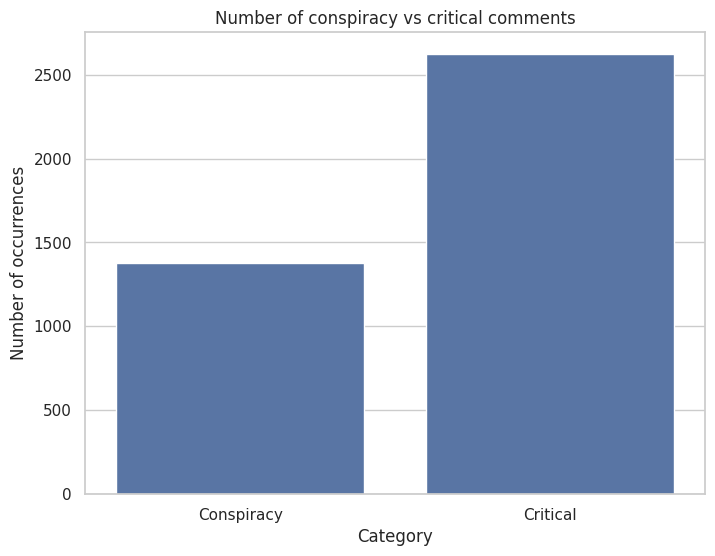

In [13]:
CONSPIRACY_counter = 0
CRITICAL_counter = 0

for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_counter+=1
    else:
        CRITICAL_counter+=1

categories = ['Conspiracy', 'Critical']
comment_counts = pd.DataFrame({'Category': categories, 'Occurrences': [CONSPIRACY_counter, CRITICAL_counter]})

# Create the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Occurrences', data=comment_counts)
plt.xlabel('Category')
plt.ylabel('Number of occurrences')
plt.title('Number of conspiracy vs critical comments')
# save to reports/figures
plt.savefig("../reports/figures/01/conspiracy_vs_critical.png")
plt.show()

# Compare the length of conspiracy and critical comments (in intervals)

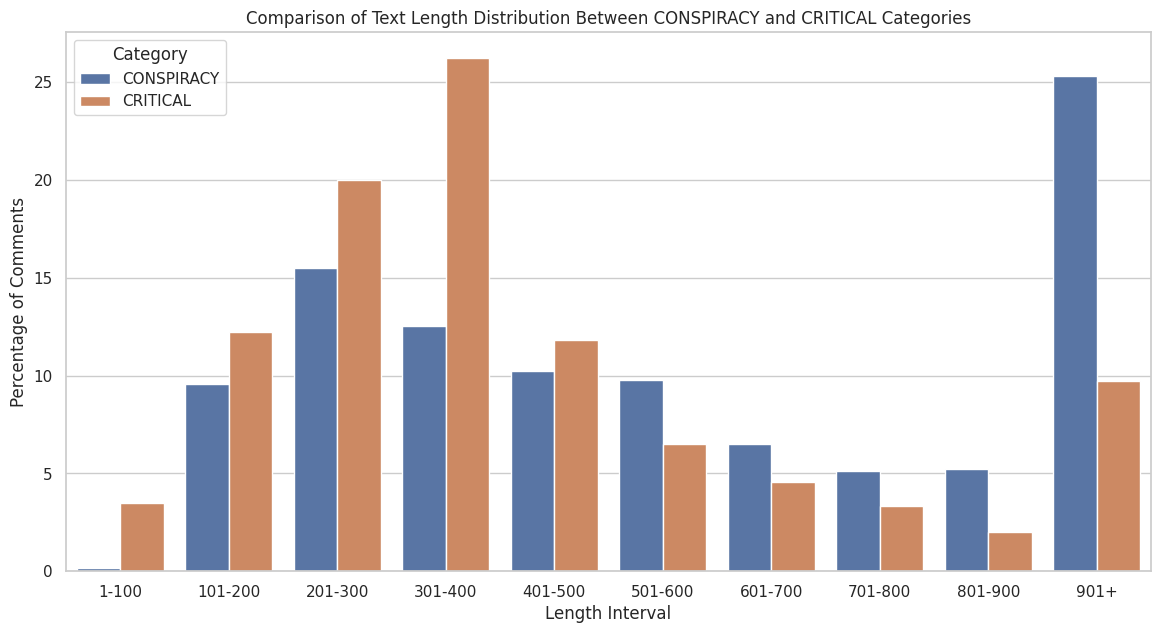

In [14]:
# Function to categorize the length into intervals
def categorize_length(length):
    if length <= 100:
        return '1-100'
    elif length <= 200:
        return '101-200'
    elif length <= 300:
        return '201-300'
    elif length <= 400:
        return '301-400'
    elif length <= 500:
        return '401-500'
    elif length <= 600:
        return '501-600'
    elif length <= 700:
        return '601-700'  # Adjusted interval correction
    elif length <= 800:
        return '701-800'
    elif length <= 900:
        return '801-900'
    else:
        return '901+'  # Adjusted to correctly include all longer comments

CONSPIRACY = []
CRITICAL = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY.append(len(comment["text"]))
    else:
        CRITICAL.append(len(comment["text"]))

# Count occurrences in specified intervals
occurrences_CONSPIRACY = Counter([categorize_length(length) for length in CONSPIRACY])
occurrences_CRITICAL = Counter([categorize_length(length) for length in CRITICAL])

# Data preparation for plotting
results = []
categories = ['CONSPIRACY', 'CRITICAL']
for category, occurrences in zip(categories, [occurrences_CONSPIRACY, occurrences_CRITICAL]):
    total = sum(occurrences.values())
    for length_interval, count in occurrences.items():
        results.append({
            'Category': category,
            'Interval': length_interval,
            'Percentage': (count / total) * 100
        })

df = pd.DataFrame(results)
# order df by "Interval" in alphabetical order
df = df.sort_values(by='Interval')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.barplot(x='Interval', y='Percentage', hue='Category', data=df)

plt.title('Comparison of Text Length Distribution Between CONSPIRACY and CRITICAL Categories')
plt.xlabel('Length Interval')
plt.ylabel('Percentage of Comments')
plt.legend(title='Category')
# save to reports/figures
plt.savefig("../reports/figures/01/length_distribution.png")
plt.show()

# Compare the vocabulary richness in terms of lemmatized unique words between conspiracy and critical comments

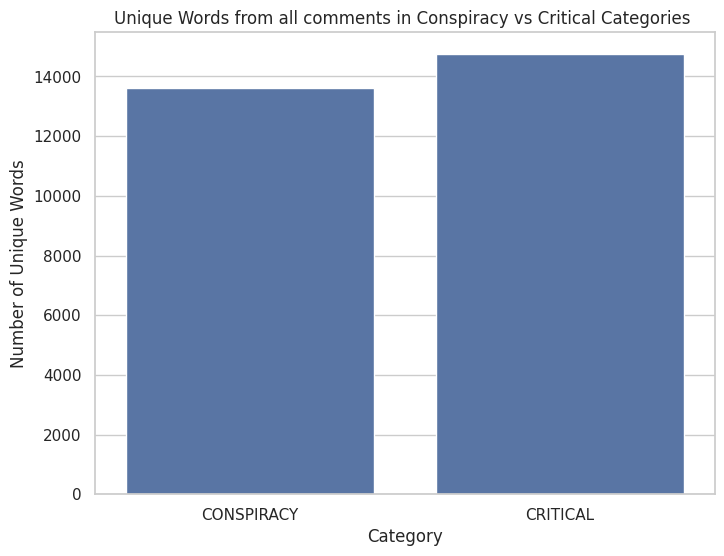

In [23]:
def get_vocabulary_richness(text:str) -> int:
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return (lemmatized_tokens)


CONSPIRACY = []
CRITICAL = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY = CONSPIRACY + get_vocabulary_richness(comment["text"])
    else:
        CRITICAL = CRITICAL + get_vocabulary_richness(comment["text"])
unique_words_CONSPIRACY = set(CONSPIRACY) 
unique_words_CRITICAL = set(CRITICAL) 

df = pd.DataFrame({
    'Category': ['CONSPIRACY', 'CRITICAL'],
    'Unique Words': [len(unique_words_CONSPIRACY), len(unique_words_CRITICAL)]
})

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Unique Words', data=df)
plt.xlabel('Category')
plt.ylabel('Number of Unique Words')
plt.title('Unique Words from all comments in Conspiracy vs Critical Categories ')
# save fig
plt.savefig("../reports/figures/01/unique_words.png")
plt.show()

['Conspiracy', 'Critical'] [0.8999274836838289, 0.9061426936283861]


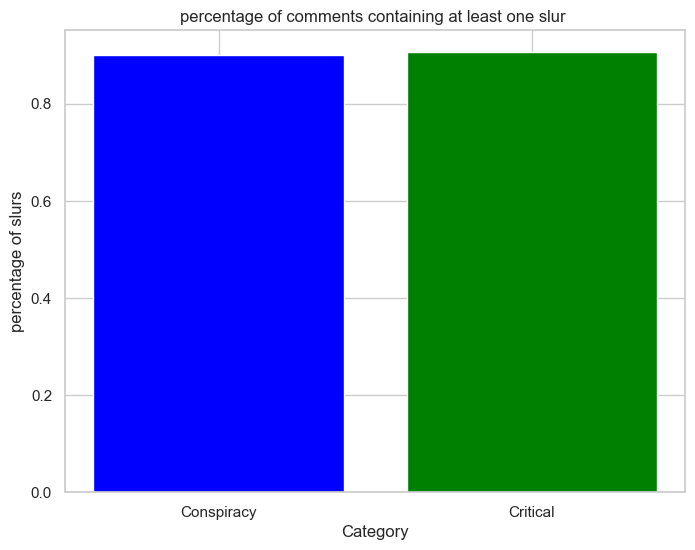

In [14]:
bad_words = json.loads(open("bad_words.json").read())
CONSPIRACY_bad_word_counter = 0
CRITICAL_bad_word_counter = 0
CONSPIRACY = []
CRITICAL = []

for comment in data:
    found_bad_word = False  
    for bad_word in bad_words:
        if bad_word in comment["text"]:
            if not found_bad_word: 
                found_bad_word = True  
                if comment["category"] == "CONSPIRACY":
                    CONSPIRACY_bad_word_counter += 1 
                else:
                    CRITICAL_bad_word_counter += 1  
            if comment["category"] == "CONSPIRACY":
                CONSPIRACY.append(bad_word)
            else:
                CRITICAL.append(bad_word)

categories = ['Conspiracy', 'Critical']
slur_counts = [CONSPIRACY_bad_word_counter/CONSPIRACY_counter, CRITICAL_bad_word_counter/CRITICAL_counter]

print(categories, slur_counts)
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, slur_counts, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('percentage of slurs')
plt.title('percentage of comments containing at least one slur ')
plt.show()

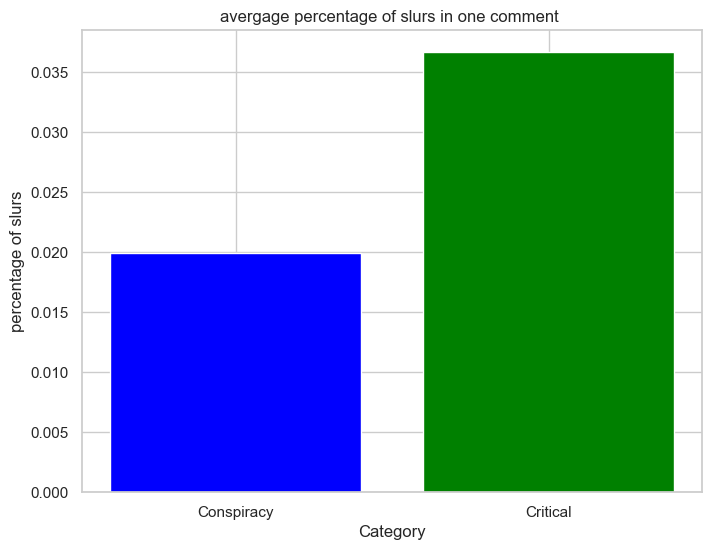

In [15]:
CONSPIRACY_avereage_bad_word_proportion_per_comment = []
CRITICAL_avereage_bad_word_proportion_per_comment = []


for comment in data:
    CONSPIRACY_badwords_per_comment = []
    CRITICAL_badwords_per_comment = []
    for bad_word in bad_words:
        if bad_word in comment["text"]:
            if comment["category"] == "CONSPIRACY":
                CONSPIRACY_badwords_per_comment.append(bad_word)
            else:
                CRITICAL_badwords_per_comment.append(bad_word)
    CONSPIRACY_avereage_bad_word_proportion_per_comment.append(len(CONSPIRACY_badwords_per_comment)/len(get_vocabulary_richness(comment["text"])))
    CRITICAL_avereage_bad_word_proportion_per_comment.append(len(CRITICAL_badwords_per_comment)/len(get_vocabulary_richness(comment["text"])))

categories = ['Conspiracy', 'Critical']

avereage_bad_word_proportion_per_comment_number= [np.mean(CONSPIRACY_avereage_bad_word_proportion_per_comment), np.mean(CRITICAL_avereage_bad_word_proportion_per_comment)]
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, avereage_bad_word_proportion_per_comment_number, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('percentage of slurs')
plt.title('avergage percentage of slurs in one comment ')
plt.show()

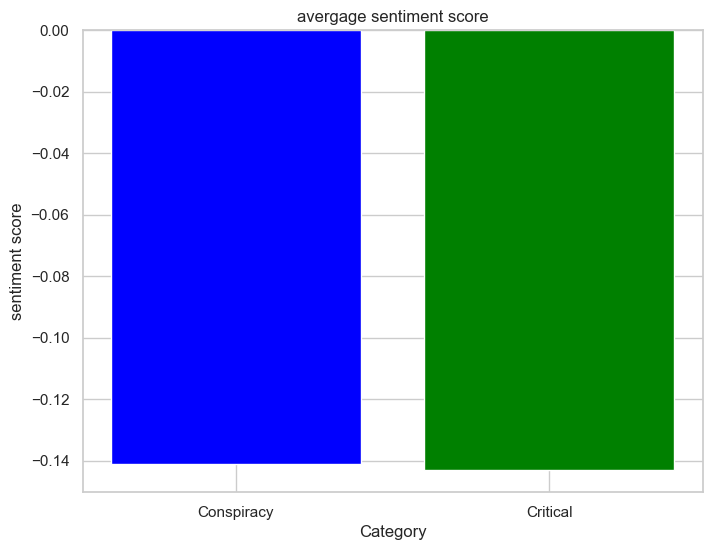

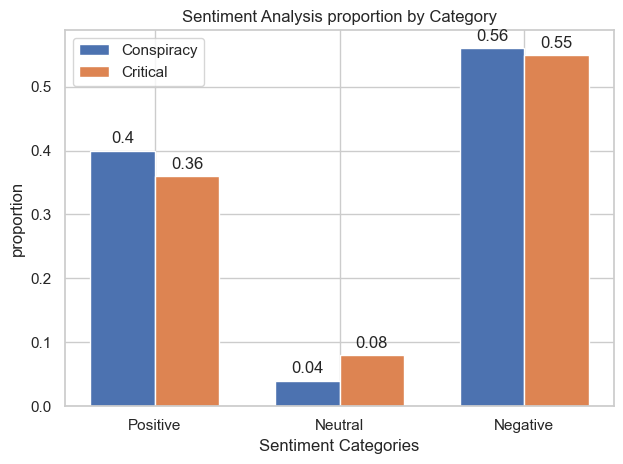

In [18]:
def analyze_sentiment(comment):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(comment)
    return sentiment

data = json.loads(open("Oppositional_thinking_analysis_dataset.json").read())
CONSPIRACY_sentiment_scores = []
CRITICAL_sentiment_scores = []


for comment in data:  
    sentiment = analyze_sentiment(comment["text"])["compound"] 
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_sentiment_scores.append(sentiment)
    else:
        CRITICAL_sentiment_scores.append(sentiment)

categories = ['Conspiracy', 'Critical']
sentiment_scores = [np.mean(CONSPIRACY_sentiment_scores), np.mean(CRITICAL_sentiment_scores)]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, sentiment_scores, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('sentiment score')
plt.title('avergage sentiment score')
plt.show()


def categorize_sentiments(sentiment_scores):
    # Initialize a dictionary to hold the count of each sentiment category
    sentiment_counts = {'pos': 0, 'neutral': 0, 'neg': 0}

    # Iterate through each score in the input list
    for score in sentiment_scores:
        # Categorize the sentiment based on the compound score
        if score >= 0.05:
            sentiment_counts['pos'] += 1
        elif score <= -0.05:
            sentiment_counts['neg'] += 1
        else:
            sentiment_counts['neutral'] += 1

    return sentiment_counts


CONSPIRACY_sentiment_scores_categories = categorize_sentiments(CONSPIRACY_sentiment_scores)
CRITICAL_sentiment_scores_categories = categorize_sentiments(CRITICAL_sentiment_scores)

# Data setup
categories = ['Positive', 'Neutral', 'Negative']
conspiracy_counts = [round(CONSPIRACY_sentiment_scores_categories['pos']/CONSPIRACY_counter,2),round(CONSPIRACY_sentiment_scores_categories['neutral']/CONSPIRACY_counter,2), round(CONSPIRACY_sentiment_scores_categories['neg']/CONSPIRACY_counter,2)]
critical_counts = [round(CRITICAL_sentiment_scores_categories['pos']/CRITICAL_counter,2), round(CRITICAL_sentiment_scores_categories['neutral']/CRITICAL_counter,2), round(CRITICAL_sentiment_scores_categories['neg']/CRITICAL_counter,2)]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, conspiracy_counts, width, label='Conspiracy')
rects2 = ax.bar(x + width/2, critical_counts, width, label='Critical')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Sentiment Categories')
ax.set_ylabel('proportion')
ax.set_title('Sentiment Analysis proportion by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add labels on the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


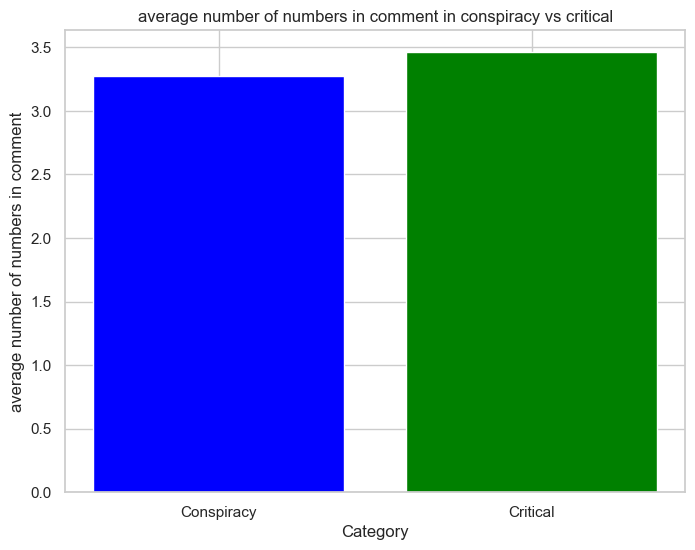

In [20]:
def extract_numbers_with_decimals(text):   
    numbers = re.findall(r'\d+\.\d+|\d+', text)
    numbers = [float(num) if '.' in num else int(num) for num in numbers]
    return numbers

CONSPIRACY_decimals = []
CRITICAL_decimals = []

decimals = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_decimals.append(len(extract_numbers_with_decimals(comment["text"])))
    else:
        CRITICAL_decimals.append(len(extract_numbers_with_decimals(comment["text"])))


categories = ['Conspiracy', 'Critical']

avereage_bad_word_proportion_per_comment_number= [np.mean(CONSPIRACY_decimals), np.mean(CRITICAL_decimals)]
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, avereage_bad_word_proportion_per_comment_number, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('average number of numbers in comment')
plt.title('average number of numbers in comment in conspiracy vs critical')
plt.show()
    



In [21]:
from collections import Counter

CONSPIRACY_decimals = []
CRITICAL_decimals = []

decimals = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_decimals += (extract_numbers_with_decimals(comment["text"]))
    else:
        CRITICAL_decimals += (extract_numbers_with_decimals(comment["text"]))

CONSPIRACY_counter = Counter(CONSPIRACY_decimals)
CONSPIRACY_number_counts = dict(CONSPIRACY_counter)
CONSPIRACY_number_counts = {k: v for k, v in sorted(CONSPIRACY_number_counts.items(), key=lambda item: item[1])}

CRITICAL_counter = Counter(CRITICAL_decimals)
CRITICAL_number_counts = dict(CRITICAL_counter)
CRITICAL_number_counts = {k: v for k, v in sorted(CRITICAL_number_counts.items(), key=lambda item: item[1])}

# dictionary: key (number) value: number of its occurence
# dict is sorted by the number of occurences
print(CONSPIRACY_number_counts)
print(CRITICAL_number_counts)

{1.7: 1, 40525569: 1, 9779559: 1, 28606: 1, 1670304968950022144: 1, 360089: 1, 136641: 1, 1503452541450870787: 1, 1957: 1, 9368: 1, 17330: 1, 8299317: 1, 1408109674436567049: 1, 682: 1, 207: 1, 1525: 1, 1562: 1, 134922: 1, 18328: 1, 54817: 1, 38652: 1, 54001: 1, 0.1: 1, 0.3: 1, 1.3: 1, 115: 1, 206: 1, 3.4: 1, 3.6: 1, 3.8: 1, 4.4: 1, 4.6: 1, 6.2: 1, 12143935: 1, 9416347: 1, 99999: 1, 1376894411028770816: 1, 18953: 1, 25.1: 1, 11017119: 1, 545: 1, 2100: 1, 1116502: 1, 465: 1, 565018: 1, 1919: 1, 517: 1, 11635264333: 1, 121: 1, 49: 1, 569: 1, 356: 1, 253: 1, 57: 1, 257: 1, 604: 1, 1995: 1, 374: 1, 376: 1, 602: 1, 541: 1, 618: 1, 620: 1, 621: 1, 623: 1, 644: 1, 645: 1, 701: 1, 702: 1, 718: 1, 719: 1, 717: 1, 677: 1, 596: 1, 628: 1, 1206574413523476480: 1, 77962970: 1, 80132944: 1, 1961: 1, 8630821: 1, 18141: 1, 1069000436756172800: 1, 11005783: 1, 48266: 1, 700: 1, 777: 1, 14254: 1, 386: 1, 212: 1, 10536697: 1, 32000: 1, 1572855465272279042: 1, 1891: 1, 32467: 1, 77: 1, 48704213: 1, 104113

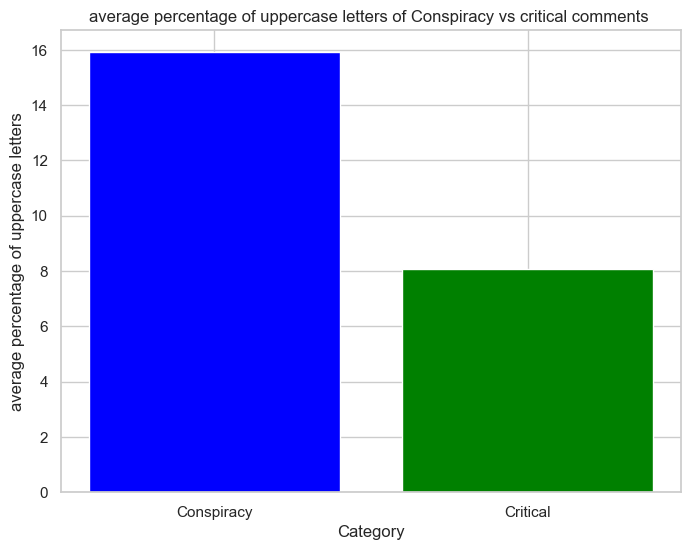

In [22]:
def calculate_uppercase_percentage(text):
    # Initialize counters for uppercase letters and total letters
    uppercase_count = 0
    total_letters = 0
    
    # Loop through each character in the text
    for char in text:
        if char.isalpha():  # Check if the character is a letter
            total_letters += 1
            if char.isupper():  # Check if the letter is uppercase
                uppercase_count += 1
    
    # Calculate the percentage of uppercase letters
    if total_letters == 0:
        return 0
    uppercase_percentage = (uppercase_count / total_letters) * 100
    
    return uppercase_percentage


CONSPIRACY_uppercase_letters = []
CRITICAL_uppercase_letters = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_uppercase_letters.append(calculate_uppercase_percentage(comment["text"]))
    else:
        CRITICAL_uppercase_letters.append(calculate_uppercase_percentage(comment["text"]))

categories = ['Conspiracy', 'Critical']

avereage_bad_word_proportion_per_comment_number= [np.mean(CONSPIRACY_uppercase_letters), np.mean(CRITICAL_uppercase_letters)]
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, avereage_bad_word_proportion_per_comment_number, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('average percentage of uppercase letters')
plt.title('average percentage of uppercase letters of Conspiracy vs critical comments ')
plt.show()

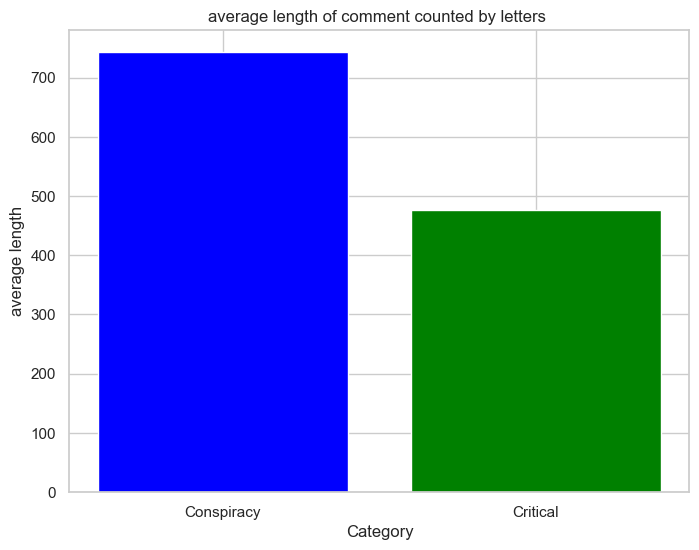

In [23]:
CONSPIRACY_length = []
CRITICAL_length = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY_length.append(len(comment["text"]))
    else:
        CRITICAL_length.append(len(comment["text"]))

categories = ['Conspiracy', 'Critical']

avereage_bad_word_proportion_per_comment_number= [np.mean(CONSPIRACY_length), np.mean(CRITICAL_length)]
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, avereage_bad_word_proportion_per_comment_number, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('average length')
plt.title('average length of comment counted by letters ')
plt.show()

In [25]:
import pandas as pd
import re
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df = pd.DataFrame(data)

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['category'], random_state=42)

# Handle class imbalance in the training set
train_df_majority = train_df[train_df.category == 'CRITICAL']
train_df_minority = train_df[train_df.category == 'CONSPIRACY']

train_df_minority_upsampled = resample(train_df_minority, 
                                       replace=True,     
                                       n_samples=len(train_df_majority),    
                                       random_state=42)

train_df_balanced = pd.concat([train_df_majority, train_df_minority_upsampled])

print(train_df_balanced['category'].value_counts())



X_train = train_df[['text', 'uppercase_amount', 'comment_length']]
y_train = train_df['category']
X_test = test_df[['text', 'uppercase_amount', 'comment_length']]
y_test = test_df['category']

category
CRITICAL      2097
CONSPIRACY    2097
Name: count, dtype: int64


In [43]:
df = pd.DataFrame(data)
df
#df = df.drop('id')

id_series = df.pop('id')

df

,text,category,uppercase_amount,comment_length
0,THIS IS MASSIVE Australian Senator Malcolm Rob...,CONSPIRACY,high,average
1,“ I ’m deeply concerned that the push to vacci...,CRITICAL,low,average
2,2021 : They wanted to know your vaccination st...,CRITICAL,low,average
3,Anthony Fauci once again defended brutal Chine...,CRITICAL,low,average
4,Proof has emerged showing that death from Wuha...,CRITICAL,neutral,long
...,...,...,...,...
3995,Police in Australia are warning that unvaccina...,CRITICAL,low,average
3996,I personally do n’t believe Putin would set of...,CONSPIRACY,high,average
3997,Pfizer lied . We know that . There 's no doubt...,CRITICAL,neutral,average
3998,""" It is utterly bizarre and inexplicable - Dr....",CRITICAL,neutral,average


In [ ]:
def preprocess(text:str, lem_tag = True, stem_tag = False) -> int:

    # Lowercasing
    text = text.lower()
    text = re.sub(r'\d+', '', text) # remove decimals  
    text = re.sub(r'[\:\-\']', '', text)  # Remove specific punctuation
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'\s+', ' ', text) # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text) # Remove special characters
    text = re.sub(r'\d+\.\d+', '', text)  # Matches one or more digits followed by a dot and one or more digits
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Matches "com" at word boundaries (whole word)


    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    if lem_tag:
    # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    if stem_tag:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]

In [49]:
tokens = "halo mein name ist Erik "
tokens = word_tokenize(tokens)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
#tokens = [stemmer.stem(word) for word in tokens]
tokens = [lemmatizer.lemmatize(word) for word in tokens]
tokens

['halo', 'mein', 'name', 'ist', 'Erik']

In [55]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_train_processed = X.copy()
        X_train_processed['text'] = X_train_processed['text'].apply(preprocess)
        print(X_train_processed)
        return X_train_processed

class StemmedCountVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.vectorizer = CountVectorizer()

    def fit(self, X, y=None):
      
        self.vectorizer.fit(X)
        return self

    def transform(self, X):
        return self.vectorizer.transform([' '.join([self.stemmer.stem(word) for word in document.split()]) for document in X])

class CombinedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, text_transformer, ngram_range = (1,1),  additional_features = []):
        self.text_transformer = text_transformer
        self.additional_features = additional_features
        self.encoder = OneHotEncoder()
        self.vectorizer = CountVectorizer(ngram_range=ngram_range)


    def fit(self, X, y=None):
        # Fit the individual transformers
        self.text_transformer.fit(X['text'])
        if self.additional_features:
            self.encoder.fit(X[self.additional_features]) 

        return self

    def transform(self, X):
      
        text_features = self.text_transformer.transform(X['text'])
     
        if self.additional_features:
            additional_features = self.encoder.transform(X[self.additional_features]).toarray()
            text_features = np.hstack((text_features.toarray(), additional_features))
       
        return text_features

# Pre-processing pipelines
pipelines = {
    'CountVectorizer with Stop Words': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(CountVectorizer(stop_words='english'), ['uppercase_amount', 'comment_length'])),
        ('classifier', MultinomialNB())
    ]),
    'TfidfVectorizer with Stop Words': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(TfidfVectorizer(stop_words='english'))),
        ('classifier', MultinomialNB())
    ]),
    'Stemmed CountVectorizer': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(StemmedCountVectorizer(), ['uppercase_amount'])),
        ('classifier', MultinomialNB())
    ])
}


df = pd.DataFrame(data)
df.pop('id')

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['category'], random_state=42)

# Handle class imbalance in the training set
train_df_majority = train_df[train_df.category == 'CRITICAL']
train_df_minority = train_df[train_df.category == 'CONSPIRACY']

train_df_minority_upsampled = resample(train_df_minority, 
                                       replace=True,     
                                       n_samples=len(train_df_majority),    
                                       random_state=42)

train_df_balanced = pd.concat([train_df_majority, train_df_minority_upsampled])

print(train_df_balanced['category'].value_counts())

# Function to train and evaluate a Naïve Bayes model
def train_and_evaluate(train_df, test_df, pipeline):
    X_train = train_df[['text', 'uppercase_amount', 'comment_length']]
    #print("1:",type(X_train))
    #print("1:",X_train)
    y_train = train_df['category']
    X_test = test_df[['text', 'uppercase_amount', 'comment_length']]
    y_test = test_df['category']
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Results for {pipeline.named_steps['features'].text_transformer.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate models with different pipelines
for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    train_and_evaluate(train_df_balanced, test_df, pipeline)

category
CRITICAL      2097
CONSPIRACY    2097
Name: count, dtype: int64
Evaluating CountVectorizer with Stop Words...
Results for CountVectorizer:
              precision    recall  f1-score   support

  CONSPIRACY       0.75      0.74      0.74       276
    CRITICAL       0.86      0.87      0.87       524

    accuracy                           0.82       800
   macro avg       0.81      0.80      0.81       800
weighted avg       0.82      0.82      0.82       800

Evaluating TfidfVectorizer with Stop Words...
Results for TfidfVectorizer:
              precision    recall  f1-score   support

  CONSPIRACY       0.73      0.83      0.78       276
    CRITICAL       0.90      0.84      0.87       524

    accuracy                           0.84       800
   macro avg       0.82      0.83      0.82       800
weighted avg       0.84      0.84      0.84       800

Evaluating Stemmed CountVectorizer...
Results for StemmedCountVectorizer:
              precision    recall  f1-score   sup

In [54]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_train_processed = X.copy()
        X_train_processed['text'] = X_train_processed['text'].apply(preprocess)
        print(X_train_processed)
        return X_train_processed


    def transform(self, X):
        return self.vectorizer.transform([' '.join([self.stemmer.stem(word) for word in document.split()]) for document in X])

class CombinedFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, text_transformer, ngram_range = (1,1),  additional_features = []):
        self.text_transformer = text_transformer
        self.additional_features = additional_features
        self.encoder = OneHotEncoder()
        self.vectorizer = CountVectorizer(ngram_range=ngram_range)


    def fit(self, X, y=None):
        # Fit the individual transformers
        self.text_transformer.fit(X['text'])
        if self.additional_features:
            self.encoder.fit(X[self.additional_features]) 

        return self

    def transform(self, X):
      
        text_features = self.text_transformer.transform(X['text'])
     
        if self.additional_features:
            additional_features = self.encoder.transform(X[self.additional_features]).toarray()
            text_features = np.hstack((text_features.toarray(), additional_features))
       
        return text_features

# Pre-processing pipelines
pipelines = {
    'CountVectorizer with Stop Words': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(CountVectorizer(stop_words='english'), ['uppercase_amount', 'comment_length'])),
        ('classifier', MultinomialNB())
    ]),
    'TfidfVectorizer with Stop Words': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(TfidfVectorizer(stop_words='english'))),
        ('classifier', MultinomialNB())
    ]),
    'Stemmed CountVectorizer': Pipeline([
        ('preprocessor', TextPreprocessor()),
        ('features', CombinedFeatures(StemmedCountVectorizer(), ['uppercase_amount'])),
        ('classifier', MultinomialNB())
    ])
}


df = pd.DataFrame(data)
df.pop('id')

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['category'], random_state=42)

# Handle class imbalance in the training set
train_df_majority = train_df[train_df.category == 'CRITICAL']
train_df_minority = train_df[train_df.category == 'CONSPIRACY']

train_df_minority_upsampled = resample(train_df_minority, 
                                       replace=True,     
                                       n_samples=len(train_df_majority),    
                                       random_state=42)

train_df_balanced = pd.concat([train_df_majority, train_df_minority_upsampled])

print(train_df_balanced['category'].value_counts())

# Function to train and evaluate a Naïve Bayes model
def train_and_evaluate(train_df, test_df, pipeline):
    X_train = train_df[['text', 'uppercase_amount', 'comment_length']]
    y_train = train_df['category']
    X_test = test_df[['text']]
    y_test = test_df['category']
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Results for {pipeline.named_steps['features'].text_transformer.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Train and evaluate models with different pipelines
for name, pipeline in pipelines.items():
    print(f"Evaluating {name}...")
    train_and_evaluate(train_df_balanced, test_df, pipeline)

category
CRITICAL      2097
CONSPIRACY    2097
Name: count, dtype: int64
Evaluating CountVectorizer with Stop Words...


AttributeError: 'TextPreprocessor' object has no attribute 'vectorizer'